In [182]:
using PyPlot
using LinearAlgebra

using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using IntervalSets
using Random 
using ArraysOfArrays
using ValueShapes
using Measurements
using BAT 


In [93]:
using MultivariateStats
using Clustering

In [31]:
function plotVectors(vecs, cols; alpha=1)
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color="#A9A9A9", zorder=0)
    plt.axhline(y=0, color="#A9A9A9", zorder=0)
    plt.grid(alpha=0.1)

    for i in 1:length(vecs)
        plt.quiver([0],
                   [0],
                   [vecs[i][1]],
                   [vecs[i][2]],
                   angles="xy", scale_units="xy", scale=1, color=cols[i],
                   alpha=alpha)
    end
end

plotVectors (generic function with 2 methods)

In [37]:
A = [-1 3 ; 2 -2]

2×2 Array{Int64,2}:
 -1   3
  2  -2

In [38]:
v = [2 ; 1]

2-element Array{Int64,1}:
 2
 1

In [39]:
# Av = [-1*2 + 1*3 ; 2*2 - 2*1]

Av = A * v

2-element Array{Int64,1}:
 1
 2

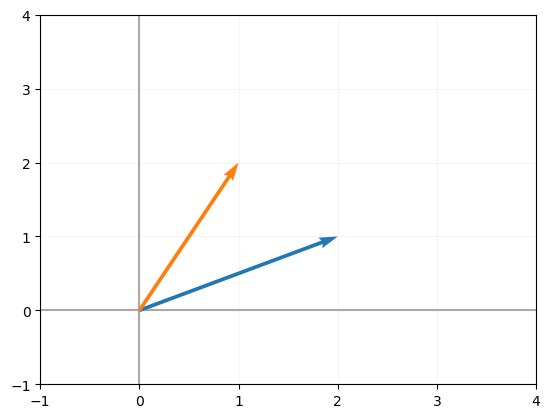

(-1.0, 4.0)

In [40]:
plotVectors([v, Av], ["C0", "C1"])

plt.ylim(-1, 4)
plt.xlim(-1, 4)

## Test 2:

In [74]:
A = [5 1 ; 3 3 ]

2×2 Array{Int64,2}:
 5  1
 3  3

In [75]:
v = [1 ; 1] # eigen vector of A 

2-element Array{Int64,1}:
 1
 1

In [76]:
λ = 6 # eigen value of v

6

In [77]:
isapprox(A*v, λ*v)

true

In [78]:
v_2 = [1 ; -3]
λ_2 = 2

2

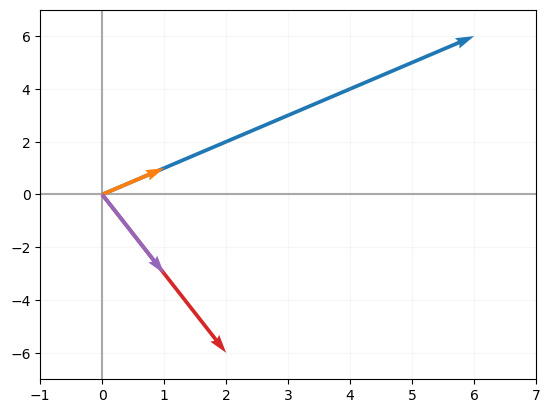

(-1.0, 7.0)

In [79]:
plotVectors([A * v, v, A*v_2, v_2], ["C0", "C1", "C3", "C4"])

plt.ylim(-7, 7)
plt.xlim(-1, 7)

## Test 3:

In [80]:
L = eigvals(A)

2-element Array{Float64,1}:
 2.0
 6.0

In [81]:
E = eigvecs(A)

2×2 Array{Float64,2}:
 -0.316228  0.707107
  0.948683  0.707107

In [82]:
v1 = E[:,1]
v2 = E[:,2]

2-element Array{Float64,1}:
 0.7071067811865475
 0.7071067811865475

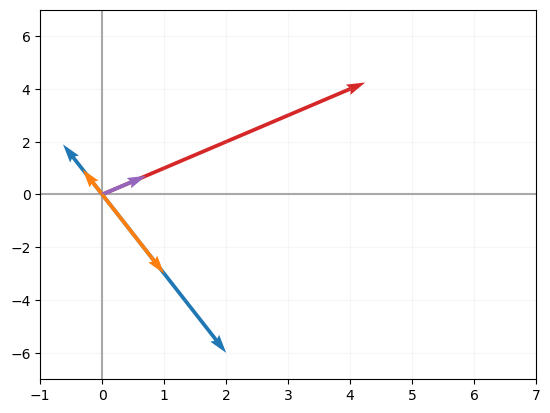

(-1.0, 7.0)

In [85]:
plotVectors([A * v1, v1, A*v2, v2, A*v_2, v_2], ["C0", "C1", "C3", "C4", "C0", "C1"])

plt.ylim(-7, 7)
plt.xlim(-1, 7)

In [86]:
# decompose matrix:

In [89]:
E  * diagm(L) * E^-1 

2×2 Array{Float64,2}:
 5.0  1.0
 3.0  3.0

In [90]:
isapprox(A, E  * diagm(L) * E^-1 )

true

# Whiteneing Transformation:

In [225]:
Σ = [3.426818298733095 12.378238116671048 -9.632531611142456; 
    12.378238116671048 69.83909693165143 -43.478993858310886; 
    -9.632531611142456 -43.478993858310886 60.0626256206892]

μ = [8.959570984309234, -9.021529871694005, -5.007789383392622]

n_dims = 3 

distribution = MvNormal(μ, Σ)

prior = NamedTupleDist(
    x = [-50 .. 50, 0 .. 50, -50 .. 50],
);

log_likelihood = let dist = distribution
    params -> begin
        LogDVal(logpdf(dist, params.x))
    end
end

posterior = PosteriorDensity(log_likelihood, prior);

samples = bat_sample(
    posterior, 
    10^4, MCMCSampling(sampler = MetropolisHastings(), nchains = 4)
).result; 

samples = bat_sample(samples, 10^3).result

samples = flatview(unshaped.(samples.v));

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/chain_pool_init.jl:63
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/chain_pool_init.jl:185
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/multi_cycle_burnin.jl:38
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 4 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 4 tuned, 4 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC tuning of 4 chains successful after 2 cycle(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/m

In [226]:
# samples = rand(distribution, 10^3)

In [229]:
cov(samples')

3×3 ElasticArrays.ElasticArray{Float64,2,1,Array{Float64,1}}:
  1.58966   2.1577   -3.42181
  2.1577   12.3581   -7.72346
 -3.42181  -7.72346  37.451

In [230]:
smpl_mean = mean(samples, dims=2)
samples_white = samples .-  smpl_mean
cov_m = cov(samples_white')

cent_el = cov_m[2,2]
cov_m[2,:] .= 0.0
cov_m[:,2] .= 0.0
cov_m[2,2] = cent_el

L = eigvals(cov_m)
E = eigvecs(cov_m)
W = E'

samples_white = (W * samples_white) ./ sqrt.(L .+ 1e-5);

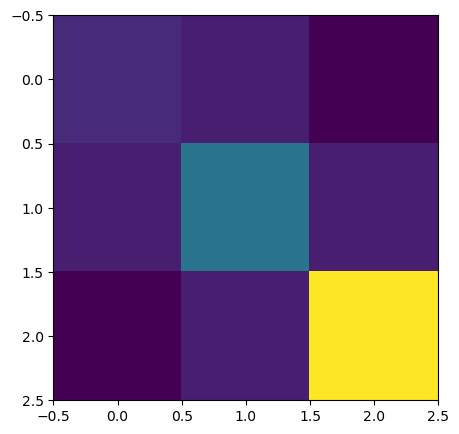

PyObject <matplotlib.image.AxesImage object at 0x7fc146155eb0>

In [231]:
fig, ax = subplots(1,1, figsize=(5,5))

ax.imshow(cov_m)

In [238]:
cov(samples_white')

3×3 ElasticArrays.ElasticArray{Float64,2,1,Array{Float64,1}}:
  0.999992      0.359239  -6.85191e-17
  0.359239      0.999999  -0.365281
 -6.85191e-17  -0.365281   1.0

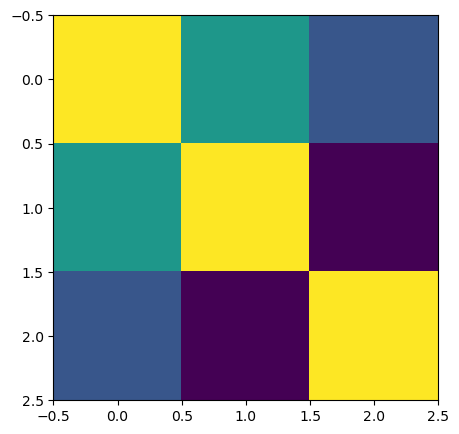

PyObject <matplotlib.image.AxesImage object at 0x7fc1459baa30>

In [232]:
fig, ax = subplots(1,1, figsize=(5,5))

ax.imshow(cov(samples_white'))

In [233]:
samples_recovered =  (W^-1)*(samples_white .* sqrt.(L .+ 1e-5)) .+ smpl_mean

3×1038 ElasticArrays.ElasticArray{Float64,2,1,Array{Float64,1}}:
  10.6312    11.1624    11.1727   …   8.89897   11.7663   11.9259
   4.41484    8.36159    3.06724      0.736016   5.26389   2.10968
 -21.3909   -17.3027   -12.6126      -9.21325   -7.2302   -8.51429

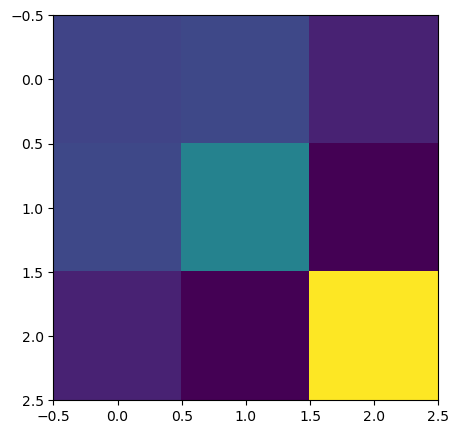

PyObject <matplotlib.image.AxesImage object at 0x7fc147572c70>

In [234]:
fig, ax = subplots(1,1, figsize=(5,5))

ax.imshow(cov(samples_recovered'))

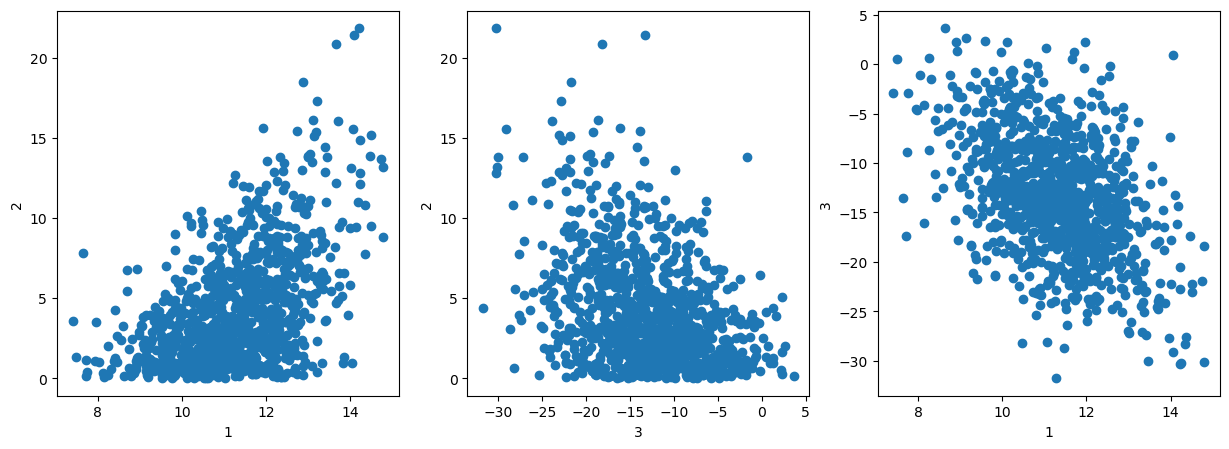

PyObject Text(832.9632352941178, 0.5, '3')

In [235]:
fig, ax = subplots(1,3, figsize=(15,5))

ax[1].scatter(samples[1,:], samples[2,:])
ax[1].set_xlabel("1")
ax[1].set_ylabel("2")

ax[2].scatter(samples[3,:], samples[2,:])
ax[2].set_xlabel("3")
ax[2].set_ylabel("2")

ax[3].scatter(samples[1,:], samples[3,:])
ax[3].set_xlabel("1")
ax[3].set_ylabel("3")

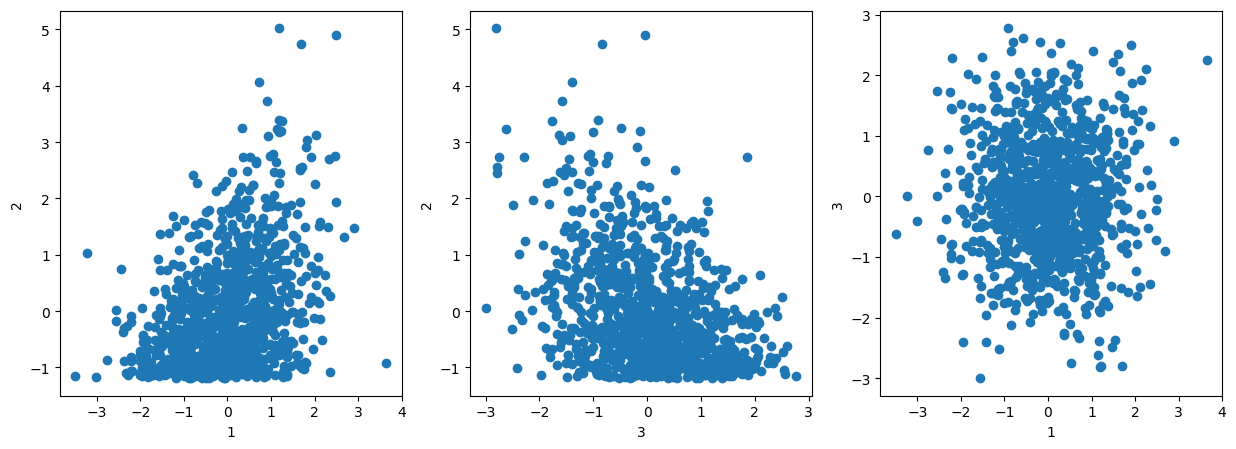

PyObject Text(844.5882352941177, 0.5, '3')

In [236]:
fig, ax = subplots(1,3, figsize=(15,5))

ax[1].scatter(samples_white[1,:], samples_white[2,:])
ax[1].set_xlabel("1")
ax[1].set_ylabel("2")

ax[2].scatter(samples_white[3,:], samples_white[2,:])
ax[2].set_xlabel("3")
ax[2].set_ylabel("2")

ax[3].scatter(samples_white[1,:], samples_white[3,:])
ax[3].set_xlabel("1")
ax[3].set_ylabel("3")

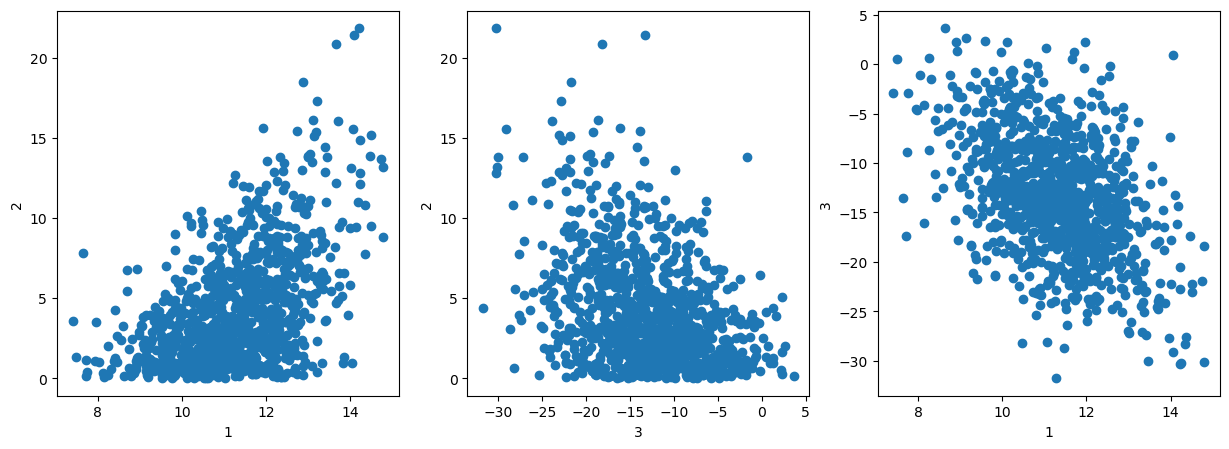

PyObject Text(832.9632352941178, 0.5, '3')

In [237]:
fig, ax = subplots(1,3, figsize=(15,5))

ax[1].scatter(samples_recovered[1,:], samples_recovered[2,:])
ax[1].set_xlabel("1")
ax[1].set_ylabel("2")

ax[2].scatter(samples_recovered[3,:], samples_recovered[2,:])
ax[2].set_xlabel("3")
ax[2].set_ylabel("2")

ax[3].scatter(samples_recovered[1,:], samples_recovered[3,:])
ax[3].set_xlabel("1")
ax[3].set_ylabel("3")